<a href="https://colab.research.google.com/github/ktg6569/0717/blob/main/0717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TensorFlow 모델은 첫 번째 데이터가 통과해야 완전히 초기화됨

🧠 CNN 구조와 동작 과정 완전 정리 (확장판)
📋 1. CNN 모델 전체 구조
🏗️ 레이어 구성
Sequential([
    # 컨볼루션 블록 1
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2, 2),

    # 컨볼루션 블록 2
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # 컨볼루션 블록 3
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # 분류기
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Animal/Car/Other
])
🔢 2. 필터 개수 총정리
레이어   필터 개수   필터 크기   출력 특징맵
Conv2D #1   16개   3×3   16개
Conv2D #2   32개   3×3   32개
Conv2D #3   64개   3×3   64개
총 필터   112개   -   112개
🎨 시각화 vs 실제
실제 사용: 112개 필터 모두 활동
화면 표시: 8개만 보여줌 (공간 제약)
숨겨진 필터: 104개 (보이지 않지만 작동 중)
⚡ 3. ReLU 활성화 함수 적용
🔥 ReLU가 적용되는 위치
Conv2D #1: 각 필터마다 → 16번
Conv2D #2: 각 필터마다 → 32번
Conv2D #3: 각 필터마다 → 64번
Dense: 각 뉴런마다 → 128번
총 ReLU 연산: 240개 위치에서 활성화

🔄 4. 데이터 흐름 (Forward Pass)
📸 이미지 1장의 여행
1️⃣ 입력 이미지: (64, 64, 3)
    ↓ Conv2D(16 filters) + ReLU
    출력: (62, 62, 16) ← 16개 특징맵
    ↓ MaxPooling2D
    출력: (31, 31, 16)

2️⃣ ↓ Conv2D(32 filters) + ReLU
    출력: (29, 29, 32) ← 32개 특징맵
    ↓ MaxPooling2D
    출력: (14, 14, 32)

3️⃣ ↓ Conv2D(64 filters) + ReLU
    출력: (12, 12, 64) ← 64개 특징맵
    ↓ MaxPooling2D
    출력: (6, 6, 64)

4️⃣ ↓ Flatten
    출력: (2,304,) ← 1차원 변환
    ↓ Dense(128) + ReLU
    출력: (128,)
    ↓ Dropout(0.5)
    ↓ Dense(3) + Softmax
    최종: (3,) → [Animal확률, Car확률, Other확률]
📊 5. 연산량 계산
🔢 이미지 1장 처리 시
컨볼루션 연산: 97,632번
ReLU 활성화: 97,760번
MaxPooling: 3번
Dense 연산: 2번
총 연산: 약 10만 번
🎓 전체 훈련 시 (200샘플 × 3epochs)
처리 이미지: 600장
총 컨볼루션: 58,579,200번
총 ReLU: 58,656,000번
총 연산: 약 6천만 번
🔥 6. 필터 개수 증가 패턴: 16→32→64
🧠 왜 2배씩 증가하는가?
📏 공간 vs 특징의 트레이드오프
입력: (64×64×3)   → 큰 이미지, 기본 정보
  ↓ Conv2D(16) + MaxPool
출력: (31×31×16)  → 중간 크기, 기본 특징들
  ↓ Conv2D(32) + MaxPool
출력: (14×14×32)  → 작은 크기, 복잡한 특징들
  ↓ Conv2D(64) + MaxPool
출력: (6×6×64)    → 매우 작음, 고수준 특징들
🎯 계층적 특징 학습
레이어   필터 개수   이미지 크기   학습하는 특징   예시
1층   16개   큰 (31×31)   📌 기본 요소   선, 엣지, 색상
2층   32개   중간 (14×14)   📌 조합 패턴   모서리, 텍스처, 곡선
3층   64개   작은 (6×6)   📌 고수준 특징   눈, 바퀴, 귀 등
🔬 동물 사진 분석 실제 예시
1층 (16개 필터): 기본 요소 검출
필터1: 세로 선 검출 |
필터2: 가로 선 검출 ─
필터3: 대각선 검출 / \
필터4-16: 다양한 방향의 엣지들
2층 (32개 필터): 패턴 조합
필터1: 둥근 모양 검출 (눈 후보?)
필터2: 직선 조합 (다리 후보?)
필터3: 곡선 패턴 (꼬리 후보?)
필터4-32: 더 복잡한 형태 조합들
3층 (64개 필터): 완전한 특징
필터1: 완전한 눈 모양
필터2: 동물 귀 형태
필터3: 다리 전체 모양
필터4-64: 동물의 각 부위들
🔢 왜 2의 거듭제곱인가?
📐 표준 CNN 설계 원칙
컴퓨터 친화적: 2진법 시스템 최적화
메모리 효율: GPU 메모리 블록과 일치
수학적 편의: 행렬 연산 최적화
검증된 패턴: 수많은 연구로 입증
🎪 다른 패턴과의 비교
# 표준 패턴 (추천)
model_A = [16, 32, 64]    # 우리 코드
성능: ⭐⭐⭐⭐⭐
🏗️ 정보 보존 법칙
공간 해상도 ↓ × 특징 해상도 ↑ = 정보량 유지
📊 메모리 사용량 분석
1층: 31×31×16 = 15,376개 값 (넓고 얕음)
2층: 14×14×32 = 6,272개 값 (중간)
3층: 6×6×64 = 2,304개 값 (좁고 깊음)
각 단계에서 정보는 압축되지만 의미는 더 풍부해집니다!

💡 7. 건축물 비유로 이해하기
🏢 CNN = 정보 처리 공장
🏢 1층 (넓은 공간, 16명 직원)
   역할: 원자재(픽셀) 기본 분류
   작업: "이건 선이야", "이건 색깔이야"

🏢 2층 (중간 공간, 32명 직원)
   역할: 1층 결과물 조합해서 부품 제작
   작업: "선들이 모여 모서리", "색깔들이 모여 패턴"

🏢 3층 (작은 공간, 64명 직원)
   역할: 2층 부품들로 완제품 조립
   작업: "모서리+패턴 = 눈", "곡선+색깔 = 귀"
층이 올라갈수록: 공간↓, 인원↑, 전문성↑, 완성도↑

🔬 8. 망원경 비유
🔭 CNN = 지능형 망원경
🔍 1단계 (광각 렌즈, 16개 센서)
   - 전체적인 형태 파악
   - "뭔가 움직이는 게 있네"

🔍 2단계 (중간 렌즈, 32개 센서)
   - 부분적인 특징 인식
   - "털이 있고, 네 다리가 있네"

🔍 3단계 (줌 렌즈, 64개 센서)
   - 정밀한 식별
   - "이건 고양이 얼굴이야!"
🎯 9. 핵심 포인트
✅ 실제 CNN의 특징
112개 필터 모두 동시에 작동
계층적 학습: 단순→복잡→고수준
정보 압축: 공간↓, 의미↑
협업 구조: 각 층이 다음 층을 도움
🖼️ 시각화의 한계
화면 제약으로 일부만 표시
실제 성능과 보이는 것은 별개
숨겨진 대부분이 진짜 일꾼
🧠 학습 과정
가중치 업데이트: 112개 필터 모두
역전파: 모든 레이어 통과
특징 학습: 자동으로 최적 패턴 발견
단계적 발전: 기초→응용→완성
🎉 10. 최종 완전 정리
🔄 필터 증가 패턴의 핵심
16→32→64 = "넓게 보고, 깊게 파고, 정확히 맞춘다"

🧩 전체 시스템의 협업
16개 필터: 기초 공사 (엣지, 색상)
32개 필터: 골조 세우기 (패턴, 형태)
64개 필터: 마무리 작업 (완전한 특징)
Dense 레이어: 최종 판단 (분류 결정)
💎 CNN의 지혜
계층적 사고: 단계별로 복잡해짐
효율적 설계: 2의 거듭제곱 패턴
정보 변환: 공간정보 → 의미정보
집단 지능: 112개 필터의 협업
이 모든 것이 합쳐져서 한 장의 사진을 보고 "이건 동물이야!"라고 말할 수 있는 인공지능이 되는 것입니다! 🚀✨🧠

In [ ]:
Open In Colab

# 기본 사용 예시
from PIL import Image, ImageFilter, ImageDraw

# 이미지 열기
img = Image.open('/content/sample_data/horse.jpg')

# 기본 정보 확인
print(f"크기: {img.size}")
print(f"모드: {img.mode}")
print(f"형식: {img.format}")

# 크기 조정
resized = img.resize((800, 600))

# 회전
rotated = img.rotate(45)

# 필터 적용
blurred = img.filter(ImageFilter.BLUR)

# 저장
img.save('output.png')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nv

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.7MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

100%|██████████| 433k/433k [00:00<00:00, 2.15MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 1786.73file/s]

Dataset download success ✅ (1.1s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 3.10MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    897664  ultralytics.nn.modules.head.Detect           [80, [64, 128, 256]]          
Model summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 629.6±417.7 MB/s, size: 50.0 KB)


train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 88.13it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1157.6±290.2 MB/s, size: 54.0 KB)


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1151.33it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.082      1.853      1.368         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all          4         17      0.634       0.87      0.888      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9278      3.138      1.165         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          4         17      0.703      0.833      0.888      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9953      2.825      1.309         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         17      0.725      0.831      0.889      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.235      2.602      1.454         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         17      0.629      0.833      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8402      2.598      1.306         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         17      0.683      0.833      0.873      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.049      2.406      1.444         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          4         17      0.709       0.75      0.879      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.268       2.48       1.46         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         17      0.767      0.743      0.879      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8933      1.874      1.264         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          4         17      0.741       0.75      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9484       1.66      1.182         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         17      0.729       0.75      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7684      1.957       1.22         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         17      0.717       0.75      0.778      0.594



10 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


                   all          4         17      0.633      0.871      0.888      0.624
                person          3         10      0.696        0.5       0.52      0.279
                   dog          1          1      0.398          1      0.995      0.597
                 horse          1          2      0.749          1      0.995      0.598
              elephant          1          2      0.574      0.723      0.828      0.381
              umbrella          1          1      0.566          1      0.995      0.995
          potted plant          1          1      0.817          1      0.995      0.895
Speed: 2.6ms preprocess, 276.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


Saving traffic_light.png to traffic_light.png

image 1/1 /content/traffic_light.png: 640x640 9 traffic lights, 302.3ms
Speed: 11.3ms preprocess, 302.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


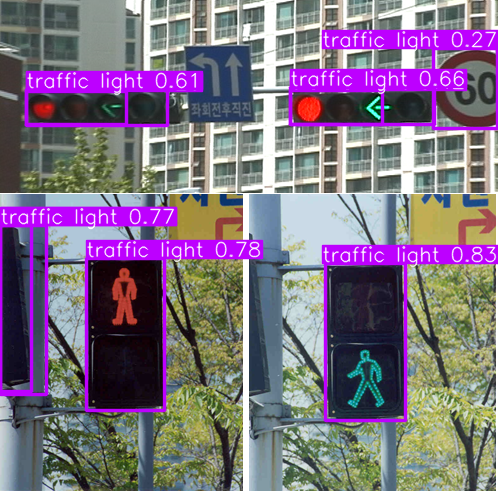

In [1]:
!pip install ultralytics
from google.colab import files
from ultralytics import YOLO # COCO 사전 훈련된 YOLOv8n 모델 로드
model = YOLO("yolov8n.pt") # 모델 정보 표시 (선택사항)
model.info() # COCO8 예제 데이터셋으로 100 에포크 훈련
results = model.train(data="coco8.yaml", epochs=10, imgsz=640) # 사진 업로드하고 경로 설정
uploaded = files.upload()
image_path = list(uploaded.keys())[0] # 업로드한 이미지에 대해 YOLOv8n 모델로 추론 실행
results = model(image_path)
results[0].show()

👋 YOLOv8 객체 탐지: 영상 입력 방식을 선택하세요
1: 유튜브 링크 입력
2: 직접 영상 파일 업로드
➡️ 입력 (1 또는 2): 2


Saving KakaoTalk_20250717_091801377.mp4 to KakaoTalk_20250717_091801377.mp4

0: 288x640 4 cars, 1 bus, 1 truck, 146.9ms
Speed: 5.3ms preprocess, 146.9ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 1


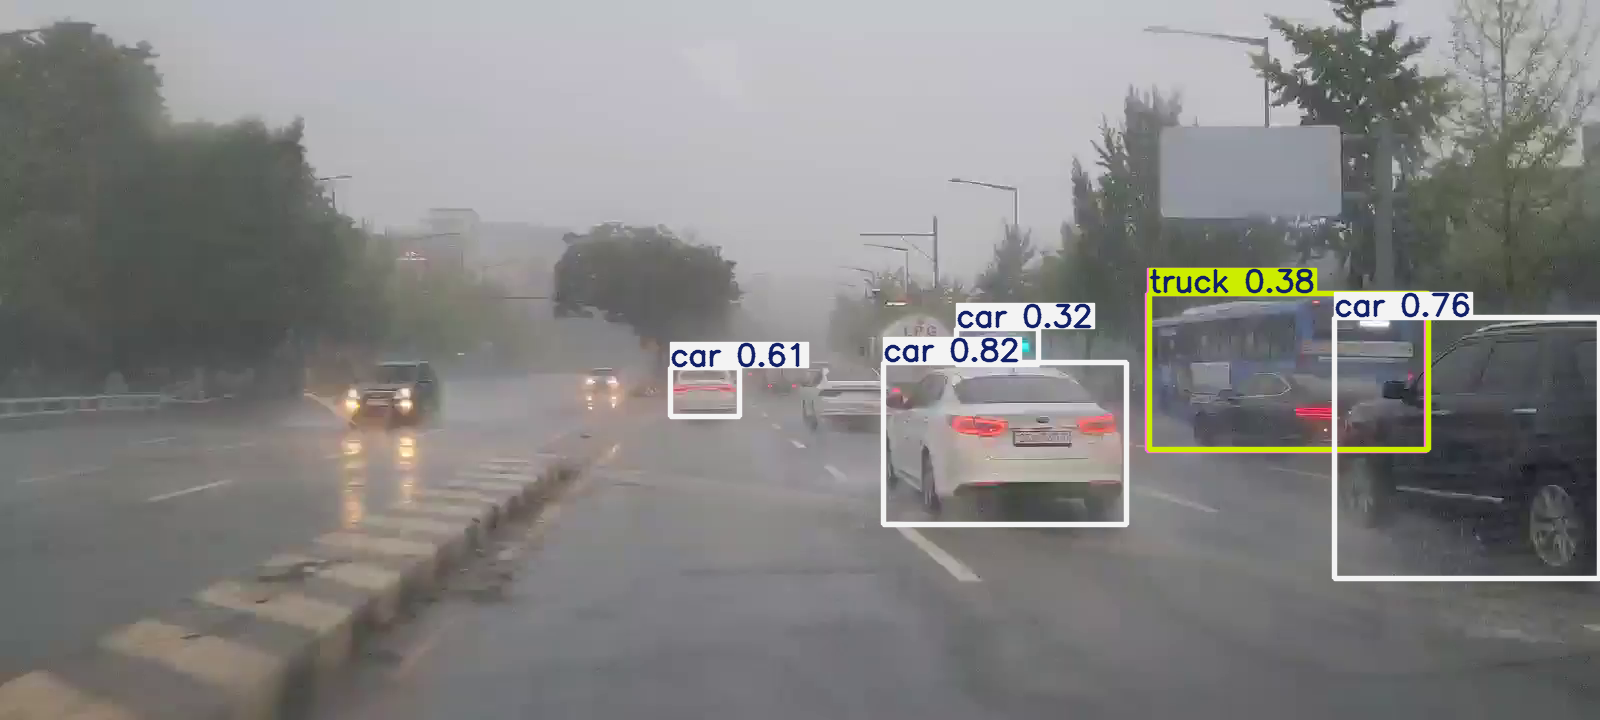


0: 288x640 5 cars, 1 bus, 191.5ms
Speed: 3.5ms preprocess, 191.5ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 2


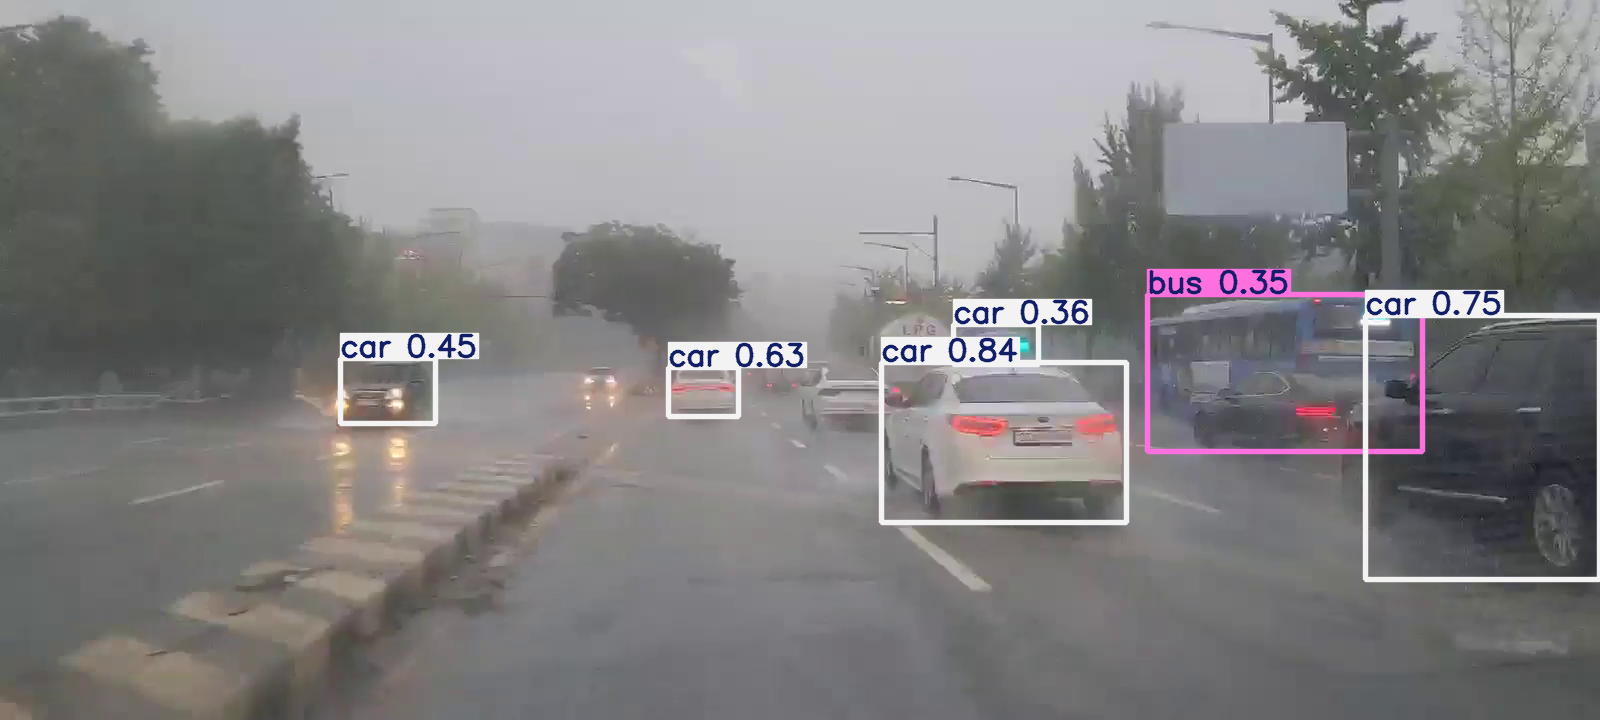


0: 288x640 7 cars, 1 bus, 180.0ms
Speed: 4.7ms preprocess, 180.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 3


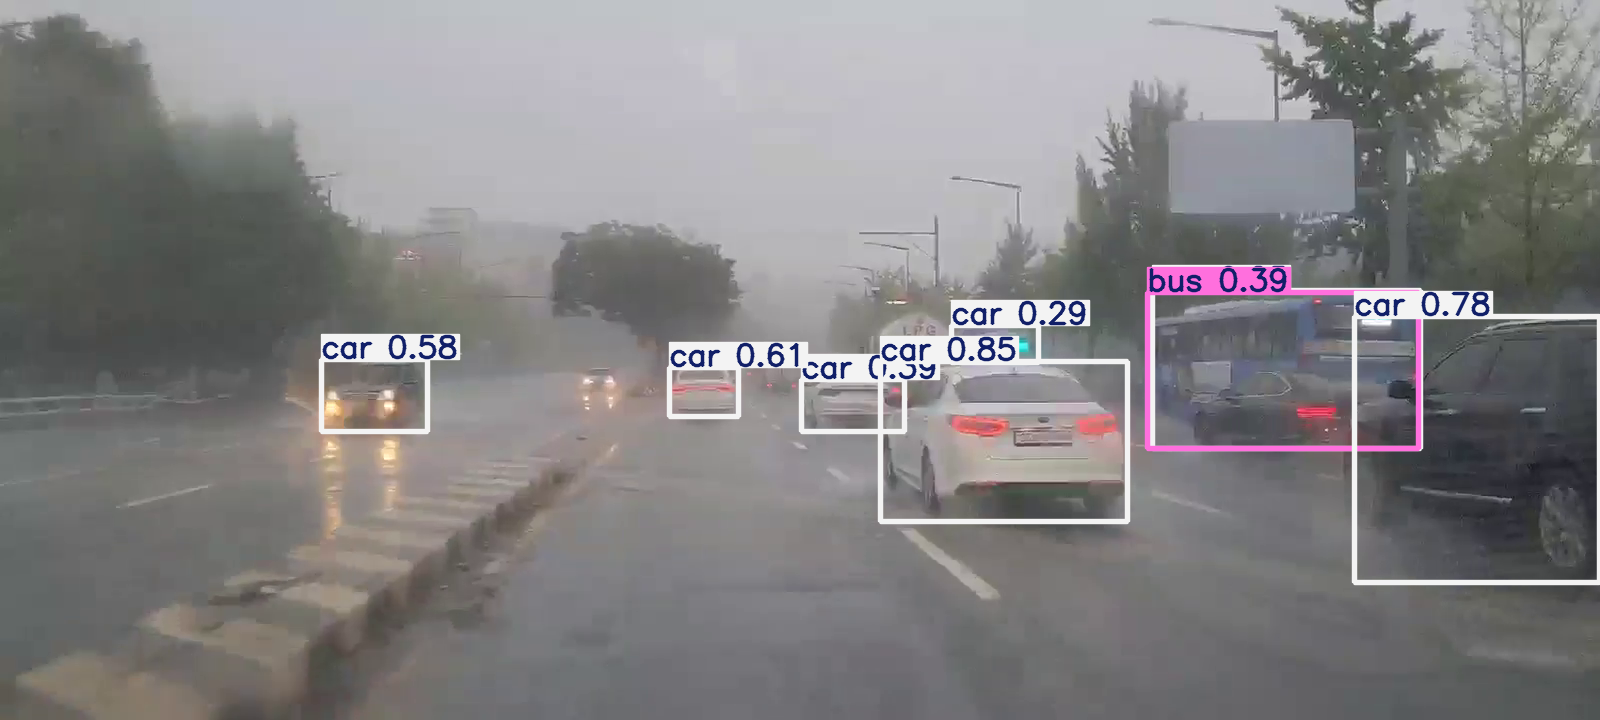


0: 288x640 4 cars, 1 truck, 186.3ms
Speed: 3.6ms preprocess, 186.3ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 4


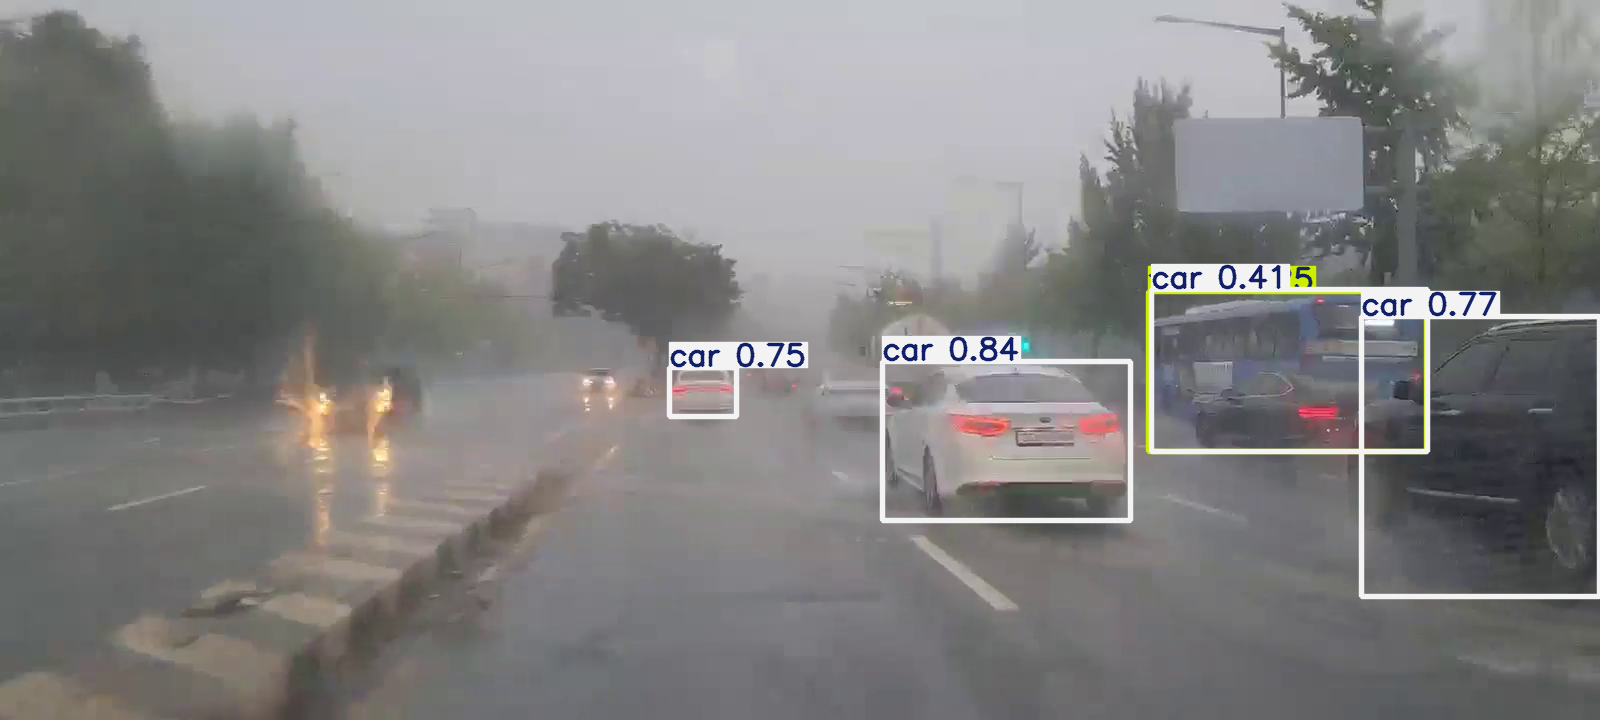


0: 288x640 4 cars, 194.1ms
Speed: 3.6ms preprocess, 194.1ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 5


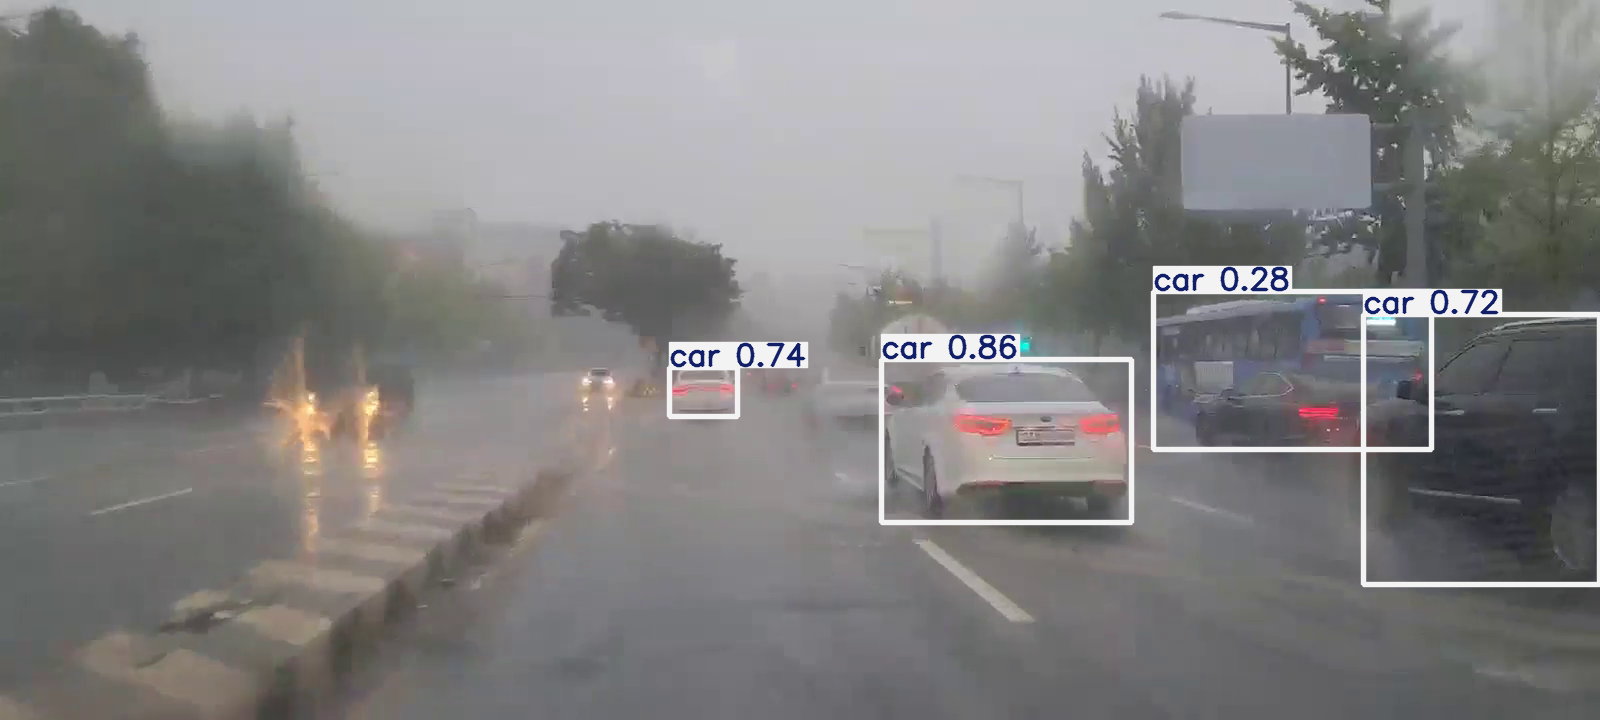


0: 288x640 4 cars, 186.0ms
Speed: 3.4ms preprocess, 186.0ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 6


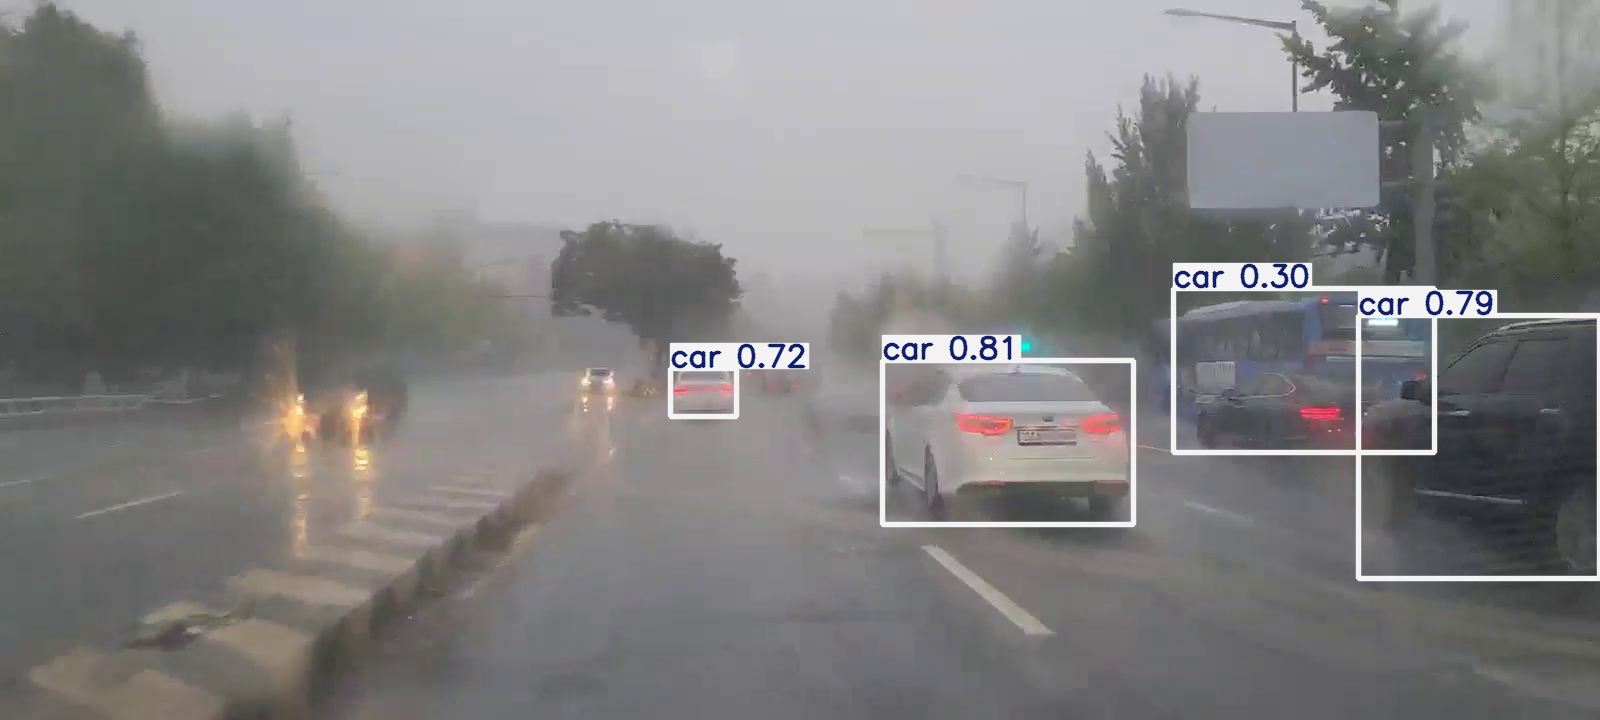


0: 288x640 4 cars, 194.2ms
Speed: 3.5ms preprocess, 194.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 7


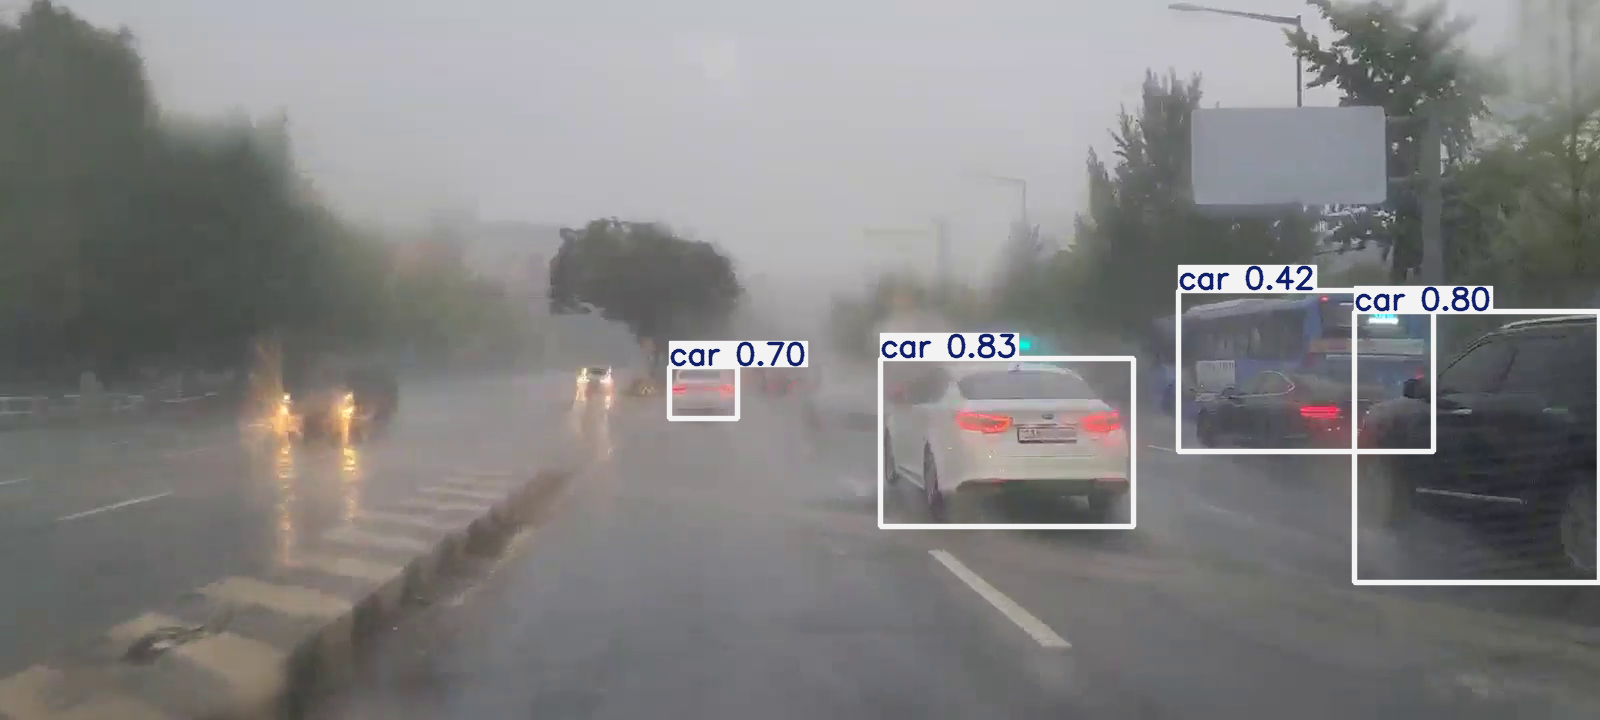


0: 288x640 1 person, 3 cars, 225.4ms
Speed: 3.7ms preprocess, 225.4ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 8


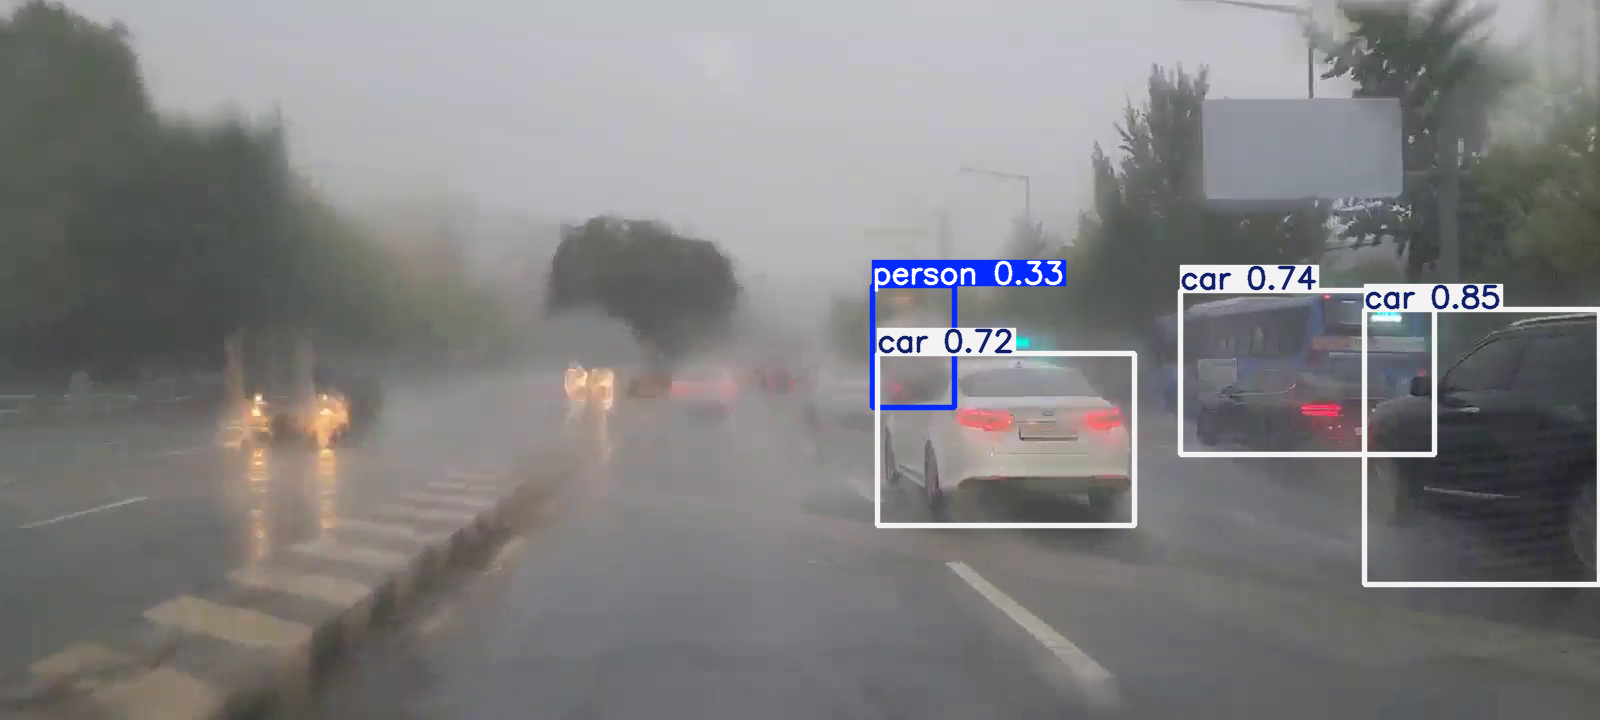


0: 288x640 1 person, 4 cars, 192.1ms
Speed: 3.3ms preprocess, 192.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 9


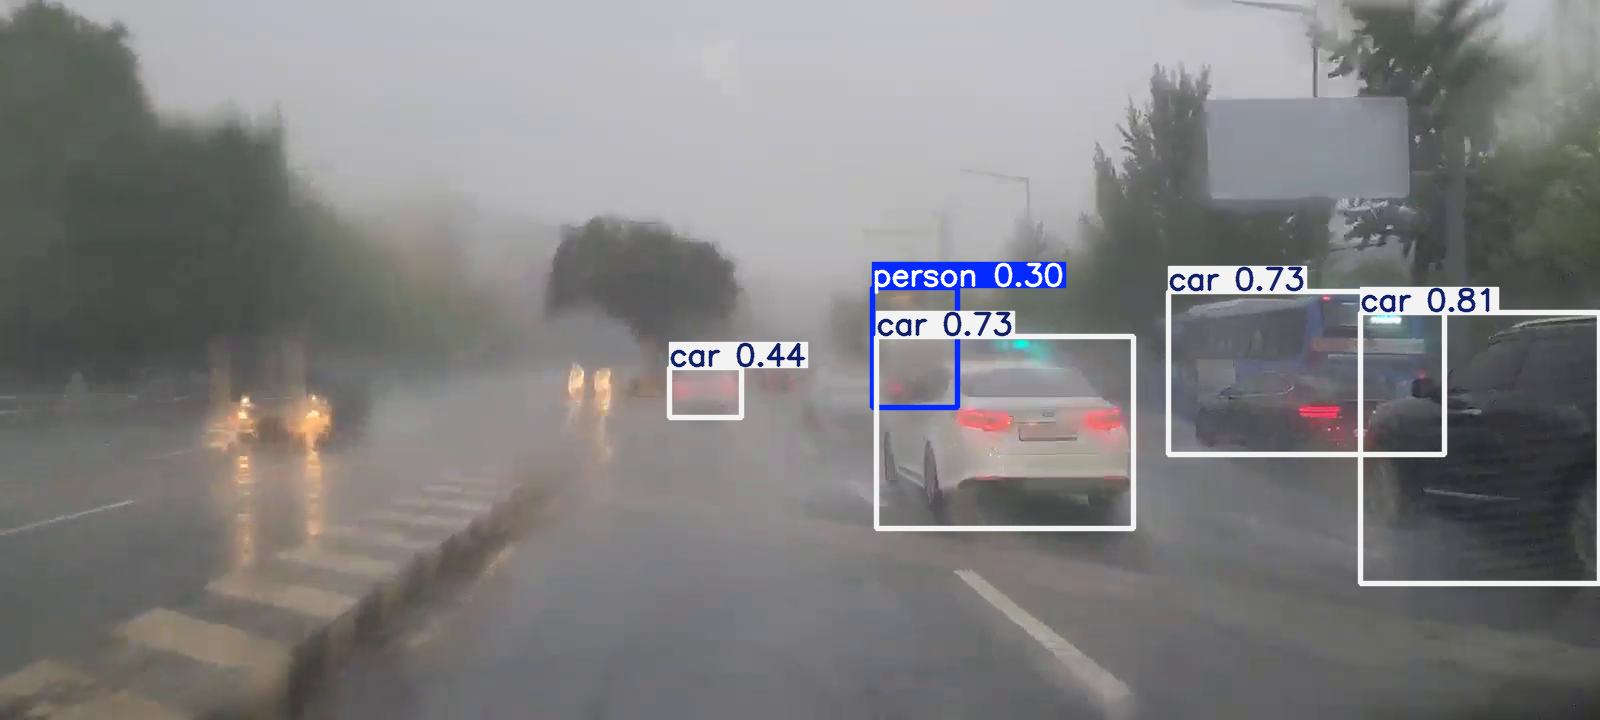


0: 288x640 1 person, 1 car, 1 truck, 185.5ms
Speed: 4.1ms preprocess, 185.5ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 640)
🖼️ Frame 10


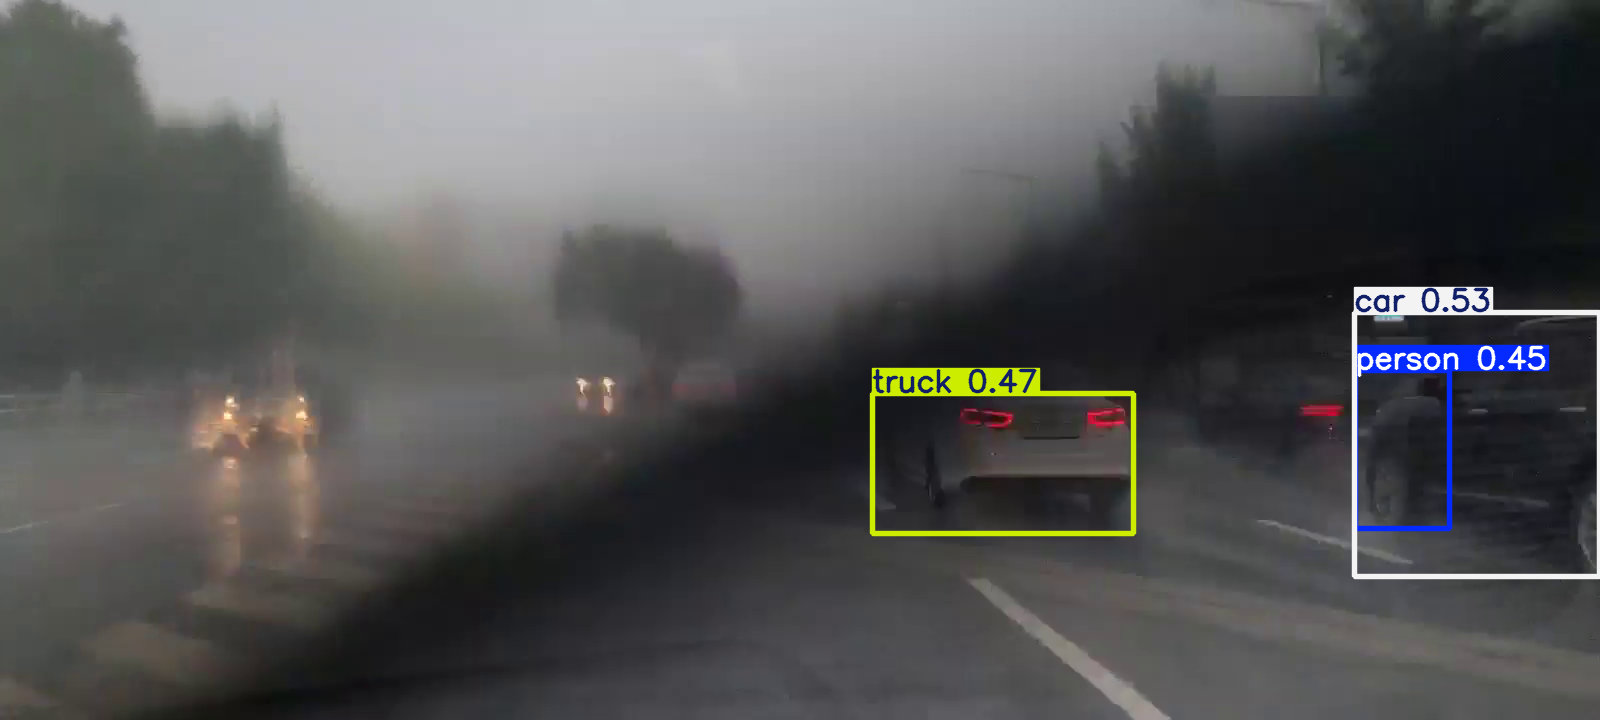

In [4]:
# 1. 필요한 패키지 설치 (처음 한 번만 실행)
!pip install -q yt-dlp ultralytics opencv-python

# 2. 라이브러리 불러오기
import cv2
import yt_dlp
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow

# 3. YOLOv8 모델 로드
model = YOLO("yolov8n.pt")  # 가볍고 빠른 모델 사용

# 4. 유튜브 영상 다운로드 함수
def download_youtube_video(url, output_path="video.mp4"):
    ydl_opts = {
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': output_path,
        'merge_output_format': 'mp4',
        'quiet': True
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    return output_path

# 5. YOLO 추론 함수 (최대 프레임 수 제한 가능)
def run_yolo_on_video(video_path, max_frames=10):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        annotated = results[0].plot()
        print(f"🖼️ Frame {frame_count+1}")
        cv2_imshow(annotated)
        frame_count += 1
    cap.release()

# 6. 사용자 입력: 업로드 방식 선택
print("👋 YOLOv8 객체 탐지: 영상 입력 방식을 선택하세요")
print("1: 유튜브 링크 입력")
print("2: 직접 영상 파일 업로드")

choice = input("➡️ 입력 (1 또는 2): ")

if choice == "1":
    # 유튜브 영상 추론
    youtube_url = input("🎥 유튜브 영상 링크를 입력하세요: ")
    video_path = download_youtube_video(youtube_url)
    run_yolo_on_video(video_path)

elif choice == "2":
    # 로컬 영상 업로드 후 추론
    uploaded = files.upload()
    video_path = list(uploaded.keys())[0]
    run_yolo_on_video(video_path)

else:
    print("❌ 잘못된 입력입니다. 1 또는 2 중 하나를 입력해주세요.")
